In [17]:
!pip install import-ipynb
import import_ipynb
import time
import os

import matplotlib.pyplot as plt
import pandas as pd
from aqi_preprocessing import AqiPreprocessing
from web_scrapper import WebScrapper
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [18]:
def run_web_scrapper(years_list: list, ws: WebScrapper) -> None:
    print(('-' * 30) + 'Data Collection - Web Scrapping' + ('-' * 30))
    start_time = time.time()
    ws.retrieve_html_for_years(years_list)
    end_time = time.time()
    print(f"Scrapping took {(end_time - start_time) / 60} minutes")

In [19]:
def run_aqi_preprocessing(years_list: list, ap: AqiPreprocessing) -> dict:
    print(('-' * 30) + 'Data Preprocessing - Cleaning AQI Data' + ('-' * 30))
    common_filename = 'data/AQI/aqi{}.csv'
    filename_list = [common_filename.format(year) for year in years_list]
    yearly_dict = ap.preprocess(filename_list)
    for year in yearly_dict.keys():
        plt.plot(range(0, 365), yearly_dict[year], label=year)
    plt.xlabel('Day')
    plt.ylabel('PM 2.5')
    plt.legend(loc='upper right')
    plt.show()
    return yearly_dict

In [20]:
def run_parse_html(years_list: list, ws: WebScrapper) -> pd.DataFrame:
    print(('-' * 30) + 'Data Preprocessing - Parse HTML' + ('-' * 30))
    return ws.parse_html_for_years(years_list)

In [21]:
def run_combine_features_with_target(features: pd.DataFrame, yearly_dict: dict, ws: WebScrapper) -> pd.DataFrame:
    print(('-' * 30) + 'Data Preprocessing - Combine features and target' + ('-' * 30))
    return ws.combine_features_with_target(features=features, yearly_dict=yearly_dict)

In [22]:
def run_clean_combined_data(data: pd.DataFrame, ap: AqiPreprocessing) -> pd.DataFrame:
    print(('-' * 30) + 'Data Preprocessing - Cleaning combined data' + ('-' * 30))
    return ap.clean_combined_data(data)

In [23]:
def run_save_combined_data(data: pd.DataFrame, folder_name: str, file_name: str, ap: AqiPreprocessing) -> None:
    print(('-' * 30) + 'Data Preprocessing - Saving combined data' + ('-' * 30))
    ap.save_combined_data(data, folder_name, file_name)




------------------------------Data Preprocessing - Cleaning AQI Data------------------------------
Preprocessing data/AQI/aqi2017.csv
Preprocessing data/AQI/aqi2018.csv
Preprocessing data/AQI/aqi2019.csv
Preprocessing data/AQI/aqi2020.csv
Preprocessing data/AQI/aqi2021.csv
Preprocessing data/AQI/aqi2022.csv


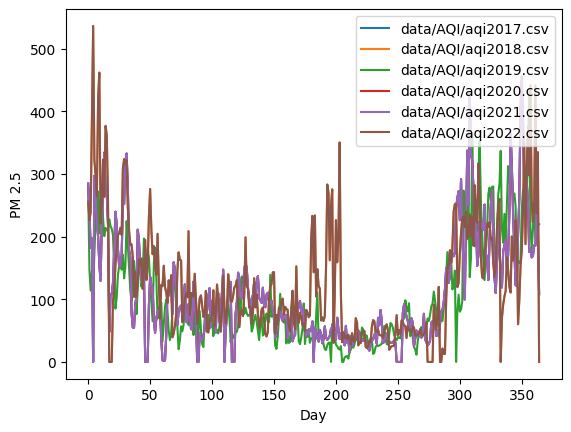




------------------------------Data Preprocessing - Parse HTML------------------------------



------------------------------Data Preprocessing - Combine features and target------------------------------



------------------------------Data Preprocessing - Cleaning combined data------------------------------



------------------------------Data Preprocessing - Saving combined data------------------------------


In [24]:
if __name__ == "__main__":
    years_list_to_send = list(range(2017, 2023))
    web_scrapper = WebScrapper()
    aqi_preprocessing = AqiPreprocessing()
    run_web_scrapper(years_list_to_send, web_scrapper)
    print("\n\n")
    yearly_dict_data = run_aqi_preprocessing(years_list_to_send, aqi_preprocessing)
    print("\n\n")
    input_features = run_parse_html(years_list_to_send, web_scrapper)
    print("\n\n")
    combined_data = run_combine_features_with_target(input_features, yearly_dict_data, web_scrapper)
    print("\n\n")
    combined_data = run_clean_combined_data(combined_data, aqi_preprocessing)
    print("\n\n")
    combined_folder_name = 'data/combined_data'
    run_save_combined_data(combined_data, combined_folder_name, 'combined_data.csv', aqi_preprocessing)